<a href="https://colab.research.google.com/github/PaulBunkie/veo/blob/main/Kaiju_1_Clip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install -U -q "google-genai>=1.44.0" # Minimum version 1.44 for video extension

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.2/53.2 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 728.8/728.8 kB 13.7 MB/s eta 0:00:00


In [2]:
# Ставим правильную библиотеку (Vertex AI)
!pip install --upgrade google-cloud-aiplatform -q

# Вызываем системное окно авторизации Colab
from google.colab import auth
auth.authenticate_user()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.9/46.9 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 43.8 MB/s eta 0:00:00


In [3]:
# 2. Импортируем библиотеку, которую требует этот туториал
from google import genai

# 3. Создаем тот самый client, пуская его в обход блокировок ключей (через Vertex AI)
PROJECT_ID = "project-97440ad7-9594-40c4-826"

client = genai.Client(
    vertexai=True,
    project=PROJECT_ID,
    location="us-central1" # Модели Veo обычно лежат в этом регионе
)

print("Client успешно создан! Можно запускать генерацию.")

Client успешно создан! Можно запускать генерацию.


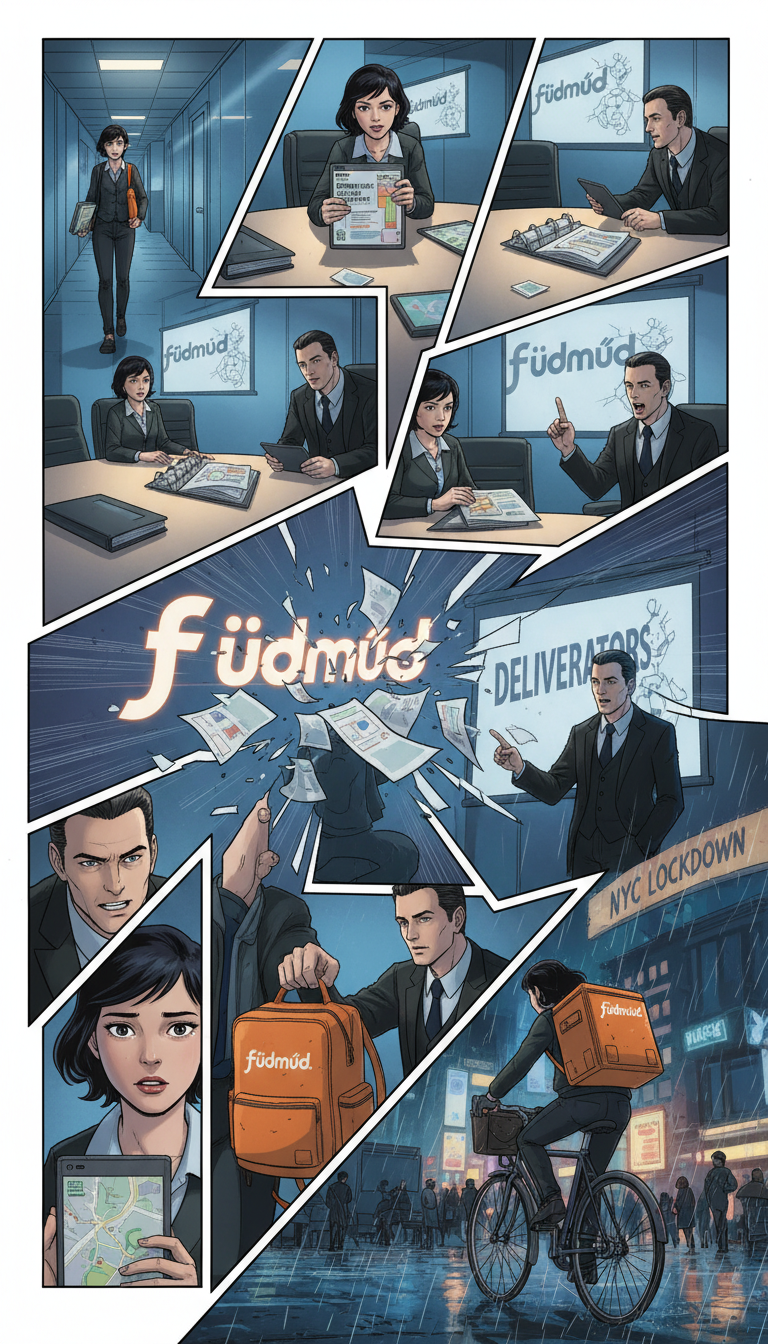

In [11]:
aspect_ratio="9:16"
from google.genai import types

# 2. Импортируем библиотеку, которую требует этот туториал
from google import genai

# 3. Создаем тот самый client, пуская его в обход блокировок ключей (через Vertex AI)
PROJECT_ID = "project-97440ad7-9594-40c4-826"

client = genai.Client(
    vertexai=True,
    project=PROJECT_ID,
    location="global"#"us-central1" ## Модели Veo обычно лежат в этом регионе
)

response = client.models.generate_content(
    model="gemini-2.5-flash-image",
    contents="""
    Draw a dynamic modern comic adaptation of the text in 6–10 sequential panels. No dialogue, No captions, no narration, no internal monologue, no text bubbles.
    Do not use evenly spaced rectangular panels. Use an asymmetrical, contemporary layout with varied panel sizes, angled or overlapping frames, and occasional full-bleed panels.
    Tell the story through action, movement, body language, lighting, environment, and cinematic camera shifts (close-ups, wide shots, low angles, Dutch tilt).
    Each panel must show clear progression and escalating tension.
    Style: bold, kinetic, high-end modern graphic novel, Stidio Ghilbi inspired graphic.

    TEXT: Jamie Gray (young woman) entered a performance review at the food-delivery startup füdmüd, feeling confident about a potential promotion. Jamie presented CEO Rob Sanders with a strategic plan to lower restaurant fees and increase delivery pay to capitalize on the impending COVID-19 lockdown in New York City. Sanders dismissed the ideas, preferring his own corporate jargon like "deliverators," and revealed that Jamie’s position was being eliminated. Instead of a promotion, Sanders "offered" Jamie the opportunity to work as a gig-economy delivery person without benefits or a salary.
    """,
    config=types.GenerateContentConfig(
      response_modalities=["IMAGE"],
      image_config=types.ImageConfig(
          aspect_ratio=aspect_ratio,
      )
    )
)
for part in response.parts:
    if part.inline_data:
        moon_image = part.as_image()
        break
moon_image.show()
moon_image.save('comic.jpg')


In [4]:
from google.colab import files

uploaded = files.upload()

for filename, content in uploaded.items():
    with open("comic.jpg", "wb") as f:
        f.write(content)
    print(f"Файл '{filename}' успешно загружен и сохранен как 'comic.jpg'")


Saving photo_2026-02-25_23-27-33.jpg to photo_2026-02-25_23-27-33.jpg
Файл 'photo_2026-02-25_23-27-33.jpg' успешно загружен и сохранен как 'comic.jpg'


In [12]:
import time
import PIL.Image
import io
from google.genai import types
from google.colab import files
from IPython.display import display, Video

def create_genai_image_from_file(filepath):
    pil_image = PIL.Image.open(filepath)
    image_bytes_io = io.BytesIO()
    pil_image.save(image_bytes_io, format=pil_image.format)
    image_bytes = image_bytes_io.getvalue()
    # Determine mime_type from PIL image format
    mime_type_map = {
        "JPEG": "image/jpeg",
        "PNG": "image/png",
        "GIF": "image/gif",
        "BMP": "image/bmp",
        "TIFF": "image/tiff",
    }
    mime_type = mime_type_map.get(pil_image.format.upper(), "image/jpeg") # Default to jpeg
    return types.Image(image_bytes=image_bytes, mime_type=mime_type)

prompt = "Jamie Gray (young woman) entered a performance review at the food-delivery startup füdmüd, feeling confident about a potential promotion. Jamie presented CEO Rob Sanders with a strategic plan to lower restaurant fees and increase delivery pay to capitalize on the impending COVID-19 lockdown in New York City. Sanders dismissed the ideas, preferring his own corporate jargon like \"deliverators,\" and revealed that Jamie’s position was being eliminated. Instead of a promotion, Sanders \"offered\" Jamie the opportunity to work as a gig-economy delivery person without benefits or a salary." # @param {"type":"string","placeholder":"Write your own prompt or leave empty to let the model decide"}

# Optional parameters
negative_prompt = "ugly, low quality, static, weird physics" # @param {type: "string"}
aspect_ratio = "16:9" # @param ["16:9"] # Only landscape is supported
resolution = "720p" # @param ["720p"] # Only 720p is supported

# 1. Создаем объекты Image из файлов
#scene_image_obj = create_genai_image_from_file('start_frame7.jpg')
moon_image_obj = create_genai_image_from_file('comic.jpg')
#sun_image_obj = create_genai_image_from_file('sun.girl.jpg') # Corrected filename

# 2. Оборачиваем их для Veo
# scene_reference = types.VideoGenerationReferenceImage(
#     image=scene_image_obj,
#     reference_type="asset"
# )
comic_reference = types.VideoGenerationReferenceImage(
    image=moon_image_obj,
    reference_type="asset"
)
# sun_reference = types.VideoGenerationReferenceImage(
#     image=sun_image_obj,
#     reference_type="asset"
# )

operation = client.models.generate_videos(
    model="veo-3.1-generate-preview", # Reference to video only wirk with Veo 3.1 at the moment
    prompt=prompt,
    config=types.GenerateVideosConfig(
      aspect_ratio=aspect_ratio,
      resolution=resolution,
      negative_prompt=negative_prompt,
      reference_images=[comic_reference],
    ),
)

# Ждем завершения
while not operation.done:
    time.sleep(20)
    operation = client.operations.get(operation)
    print("Генерация продолжается...")

# Проверяем, завершилась ли операция с ошибкой
if operation.error:
    print(f"❌ Ошибка при генерации видео: {operation.error['message']}")
else:
    # Создаем уникальный ID для этой сессии, чтобы файлы не кэшировались
    timestamp = int(time.time())

    # ВНИМАНИЕ: тут добавлена точка между operation и result
    for n, generated_video in enumerate(operation.result.generated_videos):
        video_bytes = generated_video.video.video_bytes

        filename = f"video_{timestamp}_{n}.mp4"

        with open(filename, "wb") as f:
            f.write(video_bytes)

        print(f"✅ Видео сохранено как: {filename}")

        # Показываем именно этот новый файл
        display(Video(filename, embed=True))
        files.download(filename)


Генерация продолжается...
Генерация продолжается...
Генерация продолжается...
✅ Видео сохранено как: video_1772053054_0.mp4


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>